## Created EDA using Data file(Yoshops.com Sale Order file) :
## Generated analysis report in format PDF and Excel file

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import re as re
from textblob import TextBlob
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from operator import itemgetter

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('review_dataset.csv')
df

,product_name,product_url,category,status,stars
0,Sony PlayStation PS2 Gaming Console 150 GB Har...,https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,5.0 star rating
1,Vmax HX 750 Quadcopter Drone (No Camera),https://yoshops.com/products/hx-750-remote-con...,Toys & Games,Reviewd,5.0 star rating
2,Yoshops VR BOX Virtual Reality Glasses Headset...,https://yoshops.com/products/yoshops-vr-box-vi...,Toys & Games,Reviewd,5.0 star rating
3,Sony PlayStation PS3 Console Slim 320 GB (Black),https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,4.9 star rating
4,Barbie Doll (pink),https://yoshops.com/products/barbie-doll,Toys & Games,Reviewd,4.9 star rating
...,...,...,...,...,...
1856,Hammer Pulse Oximeter Unisex Smartwatch with B...,https://yoshops.com/products/hammer-pulse-oxim...,Mumbai,NaN,NaN
1857,Hammer Sting 2.0 Wireless Bluetooth Neckband E...,https://yoshops.com/products/hammer-sting-2-0-...,Mumbai,NaN,NaN
1858,BBA Online Class Live Tuition Training Program...,https://yoshops.com/products/bba-online-class-...,Mumbai,NaN,NaN
1859,B.TECH Online Class Live Tuition Training Prog...,https://yoshops.com/products/b-tech-online-cla...,Mumbai,Reviewd,5.0 star rating


## Understand Data

In [5]:
#Finding non-null columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  1861 non-null   object
 1   product_url   1861 non-null   object
 2   category      1861 non-null   object
 3   status        606 non-null    object
 4   stars         606 non-null    object
dtypes: object(5)
memory usage: 72.8+ KB


In [6]:
df.isnull().sum()

product_name       0
product_url        0
category           0
status          1255
stars           1255
dtype: int64

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

product_name    0
product_url     0
category        0
status          0
stars           0
dtype: int64

In [8]:
#Finding Duplicates
sum(df.duplicated())

0

In [9]:
df

,product_name,product_url,category,status,stars
0,Sony PlayStation PS2 Gaming Console 150 GB Har...,https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,5.0 star rating
1,Vmax HX 750 Quadcopter Drone (No Camera),https://yoshops.com/products/hx-750-remote-con...,Toys & Games,Reviewd,5.0 star rating
2,Yoshops VR BOX Virtual Reality Glasses Headset...,https://yoshops.com/products/yoshops-vr-box-vi...,Toys & Games,Reviewd,5.0 star rating
3,Sony PlayStation PS3 Console Slim 320 GB (Black),https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,4.9 star rating
4,Barbie Doll (pink),https://yoshops.com/products/barbie-doll,Toys & Games,Reviewd,4.9 star rating
...,...,...,...,...,...
1847,OLIFAIR Alkaline De-Tan Cream White - 350 gm (...,https://yoshops.com/products/olifair-alkaline-...,Mumbai,Reviewd,5.0 star rating
1848,YouTuber Akshay Bhansali YouTube Channel name ...,https://yoshops.com/products/youtuber-akshay-b...,Mumbai,Reviewd,5.0 star rating
1849,Hindi Class For STD 1 to STD 10 Free 5 Demo Class,https://yoshops.com/products/hindi-class-for-s...,Mumbai,Reviewd,5.0 star rating
1852,Hammer Smart Watch Pulse 2.0 with Blood Oxygen...,https://yoshops.com/products/hammer-smart-watc...,Mumbai,Reviewd,5.0 star rating


In [10]:
#rows v/s column
df.shape


(606, 5)

In [11]:
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return ".".join(num)
df['ratings']=df['stars'].apply(lambda x: find_number(x))


In [12]:
df

,product_name,product_url,category,status,stars,ratings
0,Sony PlayStation PS2 Gaming Console 150 GB Har...,https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,5.0 star rating,5.0
1,Vmax HX 750 Quadcopter Drone (No Camera),https://yoshops.com/products/hx-750-remote-con...,Toys & Games,Reviewd,5.0 star rating,5.0
2,Yoshops VR BOX Virtual Reality Glasses Headset...,https://yoshops.com/products/yoshops-vr-box-vi...,Toys & Games,Reviewd,5.0 star rating,5.0
3,Sony PlayStation PS3 Console Slim 320 GB (Black),https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,4.9 star rating,4.9
4,Barbie Doll (pink),https://yoshops.com/products/barbie-doll,Toys & Games,Reviewd,4.9 star rating,4.9
...,...,...,...,...,...,...
1847,OLIFAIR Alkaline De-Tan Cream White - 350 gm (...,https://yoshops.com/products/olifair-alkaline-...,Mumbai,Reviewd,5.0 star rating,5.0
1848,YouTuber Akshay Bhansali YouTube Channel name ...,https://yoshops.com/products/youtuber-akshay-b...,Mumbai,Reviewd,5.0 star rating,5.0
1849,Hindi Class For STD 1 to STD 10 Free 5 Demo Class,https://yoshops.com/products/hindi-class-for-s...,Mumbai,Reviewd,5.0 star rating,5.0
1852,Hammer Smart Watch Pulse 2.0 with Blood Oxygen...,https://yoshops.com/products/hammer-smart-watc...,Mumbai,Reviewd,5.0 star rating,5.0


## Enter 1 to see the analysis of Reviews given by Customers

Enter 1 to to see reviews Cx Reviews analysis: 1


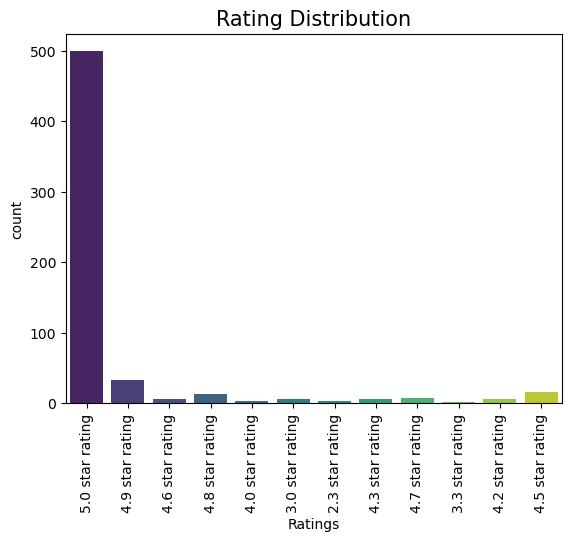

In [13]:
a = int(input("Enter 1 to to see reviews Cx Reviews analysis: "))
if a == 1: 
    sns.countplot(x = 'stars', palette='viridis', data=df )
    plt.title('Rating Distribution', size=15)
    plt.xlabel('Ratings')
    plt.xticks(rotation=90)
    plt.show()
else: 
    print("Enter Valid Input: ")

## Enter 2 to see the analysis of different payment methods used by the Customers

In [14]:
data = pd.read_csv('orders_2016-2020_Dataset.csv')
data

,Order #,Order Date and Time Stamp,Fulfillment Status,Payment Status,Payment Date and Time Stamp,Fulfillment Date and Time Stamp,Currency,Subtotal,Shipping Method,Shipping Cost,...,Payment Method,Tracking #,Special Instructions,LineItem Name,LineItem SKU,LineItem Options,LineItem Add-ons,LineItem Qty,LineItem Sale Price,LineItem Type
0,R929392577,09-11-2020 20:36:26 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Boat Rockerz 530 Bluetooth Headphone with Mic ...,NaN,NaN,NaN,1,₹ 799.00,physical
1,R653462960,09-11-2020 20:18:26 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Samsung U Flex Wireless Bluetooth Flexible Hea...,PL000032123,NaN,NaN,1,₹ 699.00,physical
2,R226302759,09-11-2020 19:56:21 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Boat Rockerz 530 Bluetooth Headphone with Mic ...,NaN,NaN,NaN,1,₹ 799.00,physical
3,R390235057,09-11-2020 19:37:40 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 599.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,JBL Tempo On-Ear Headphone,PL000157,NaN,NaN,1,₹ 599.00,physical
4,R813855117,09-11-2020 18:35:47 +0530,Cancelled,Paid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Mi Neckband Bluetooth Headset with Mic (Black),PL000041332,NaN,NaN,1,₹ 699.00,physical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,R243395005,05-10-2016 04:17:45 +0530,Cancelled,Unpaid,NaN,NaN,INR,₹ 50.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Ear Wired Earphones With Mic White,11,NaN,NaN,1,₹ 50.00,physical
2293,R607209508,03-10-2016 15:10:47 +0530,Cancelled,Unpaid,NaN,NaN,INR,₹ 500.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,I Kall K-66 White,9,NaN,NaN,1,₹ 500.00,physical
2294,R140316623,29-09-2016 18:33:27 +0530,Cancelled,Unpaid,NaN,NaN,INR,"₹ 4,000.00",Ships Free,₹ 0.00,...,NaN,NaN,NaN,Electric Steam Cooker Maestro MC1,1,NaN,NaN,2,"₹ 2,000.00",physical
2295,R192037084,28-09-2016 18:59:22 +0530,Cancelled,Unpaid,NaN,NaN,INR,"₹ 2,000.00",Ships Free,₹ 0.00,...,NaN,NaN,NaN,Electric Steam Cooker Maestro MC1,1,NaN,NaN,1,"₹ 2,000.00",physical


In [15]:
data.isnull().sum()

Order #                               0
Order Date and Time Stamp             0
Fulfillment Status                    0
Payment Status                        0
Payment Date and Time Stamp        2057
Fulfillment Date and Time Stamp    2068
Currency                              0
Subtotal                              0
Shipping Method                       0
Shipping Cost                         0
Tax Method                         2296
Taxes                                 0
Total                                 0
Coupon Code                        2140
Coupon Code Name                   2140
Discount                              0
Billing Name                       1967
Billing Country                    1967
Billing Street Address             1967
Billing Street Address 2           2100
Billing City                       1967
Billing State                      1975
Billing Zip                        1967
Shipping Name                         0
Shipping Country                      0


In [16]:
payment_method = data.loc[:,["Order #","Subtotal","Payment Status","Payment Method"]]

In [17]:
payment_method

,Order #,Subtotal,Payment Status,Payment Method
0,R929392577,₹ 799.00,Unpaid,NaN
1,R653462960,₹ 699.00,Unpaid,NaN
2,R226302759,₹ 799.00,Unpaid,NaN
3,R390235057,₹ 599.00,Unpaid,NaN
4,R813855117,₹ 699.00,Paid,NaN
...,...,...,...,...
2292,R243395005,₹ 50.00,Unpaid,NaN
2293,R607209508,₹ 500.00,Unpaid,NaN
2294,R140316623,"₹ 4,000.00",Unpaid,NaN
2295,R192037084,"₹ 2,000.00",Unpaid,NaN


In [18]:
payment_method.dropna(inplace=True)
payment_method.isnull().sum()

Order #           0
Subtotal          0
Payment Status    0
Payment Method    0
dtype: int64

In [19]:
sum(payment_method.duplicated())

31

In [20]:
payment_method=payment_method.drop_duplicates()

In [21]:
payment_method

,Order #,Subtotal,Payment Status,Payment Method
164,R126827740,₹ 140.00,Paid,CCAvenue ₹140.00
489,R101196376,"₹ 1,499.00",Paid,"CCAvenue ₹1,700.00"
847,R889558835,"₹ 1,299.00",Paid,"CCAvenue ₹1,299.00"
904,R638208952,₹ 799.00,Paid,CCAvenue ₹799.00
1038,R085983251,"₹ 1,499.00",Paid,"CCAvenue ₹1,700.00"
...,...,...,...,...
2252,R597121151,₹ 250.00,Paid,Offline Payment ₹250.00
2253,R350563716,₹ 100.00,Paid,Offline Payment ₹100.00
2255,R730949240,₹ 150.00,Paid,CCAvenue ₹150.00
2256,R804952406,₹ 150.00,Paid,Offline Payment ₹150.00


In [22]:
#To split payment Method and amount

def search_words(text):
    result = re.findall(r'\b[^\d\W]+\b', text)
    return " ".join(result)

payment_method['Method']=payment_method['Payment Method'].apply(lambda x : search_words(x))

In [23]:
payment_method

,Order #,Subtotal,Payment Status,Payment Method,Method
164,R126827740,₹ 140.00,Paid,CCAvenue ₹140.00,CCAvenue
489,R101196376,"₹ 1,499.00",Paid,"CCAvenue ₹1,700.00",CCAvenue
847,R889558835,"₹ 1,299.00",Paid,"CCAvenue ₹1,299.00",CCAvenue
904,R638208952,₹ 799.00,Paid,CCAvenue ₹799.00,CCAvenue
1038,R085983251,"₹ 1,499.00",Paid,"CCAvenue ₹1,700.00",CCAvenue
...,...,...,...,...,...
2252,R597121151,₹ 250.00,Paid,Offline Payment ₹250.00,Offline Payment
2253,R350563716,₹ 100.00,Paid,Offline Payment ₹100.00,Offline Payment
2255,R730949240,₹ 150.00,Paid,CCAvenue ₹150.00,CCAvenue
2256,R804952406,₹ 150.00,Paid,Offline Payment ₹150.00,Offline Payment


In [24]:
# To Find out the counts of payment method

payment_method = payment_method.replace(['Offline Payment Offline Payment'], 'Offline Payment')
payment_method = payment_method.replace(['CCAvenue Offline Payment'], 'CCAvenue')
payment_method['Method'].value_counts()

Offline Payment    169
CCAvenue            40
Name: Method, dtype: int64

Enter 2 to see cx payment methods analysis: 2


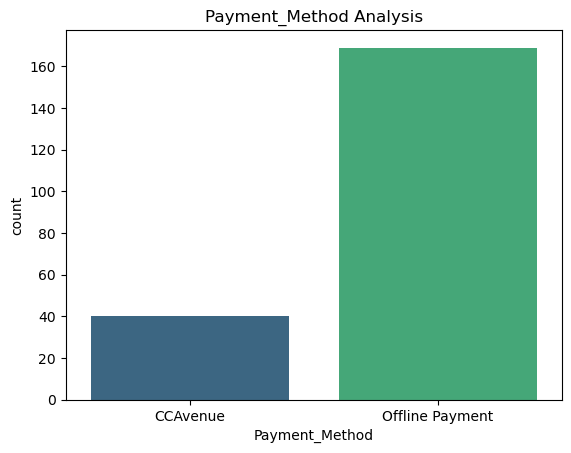

In [25]:
#Print the graph

a=int(input("Enter 2 to see cx payment methods analysis: "))
if a == 2:
    sns.countplot(x = 'Method', palette='viridis', data=payment_method)
    plt.title('Payment_Method Analysis', size=12)
    plt.xlabel('Payment_Method')
    plt.show()
else:
    print("Enter Valid Input: ")

## Enter 3 to see the analysis of Top Consumer States of India

In [26]:
# To extract specific columns for data analysis

State_orders = data.loc[:,["Order #","Shipping Name","Shipping State","Shipping Country"]]
State_orders

,Order #,Shipping Name,Shipping State,Shipping Country
0,R929392577,Neetu Yadav,IN-HR,IND
1,R653462960,Lucky Koli,IN-AN,IND
2,R226302759,Raghu A,IN-KA,IND
3,R390235057,Hemant Vaishnav,IN-RJ,IND
4,R813855117,Munna mumar Munna,IN-AN,IND
...,...,...,...,...
2292,R243395005,Uuu Ugagg,IN-AN,IND
2293,R607209508,Dipam Sahu,IN-OR,IND
2294,R140316623,lipika sahu,IN-OR,IND
2295,R192037084,prabeen patra,IN-AN,IND


In [27]:
# To extract specific data condition

State_orders = State_orders[State_orders['Shipping Country'] == "IND"]
State_orders

,Order #,Shipping Name,Shipping State,Shipping Country
0,R929392577,Neetu Yadav,IN-HR,IND
1,R653462960,Lucky Koli,IN-AN,IND
2,R226302759,Raghu A,IN-KA,IND
3,R390235057,Hemant Vaishnav,IN-RJ,IND
4,R813855117,Munna mumar Munna,IN-AN,IND
...,...,...,...,...
2292,R243395005,Uuu Ugagg,IN-AN,IND
2293,R607209508,Dipam Sahu,IN-OR,IND
2294,R140316623,lipika sahu,IN-OR,IND
2295,R192037084,prabeen patra,IN-AN,IND


In [28]:
sum(State_orders.duplicated())

58

In [29]:
State_orders=State_orders.drop_duplicates()
State_orders

,Order #,Shipping Name,Shipping State,Shipping Country
0,R929392577,Neetu Yadav,IN-HR,IND
1,R653462960,Lucky Koli,IN-AN,IND
2,R226302759,Raghu A,IN-KA,IND
3,R390235057,Hemant Vaishnav,IN-RJ,IND
4,R813855117,Munna mumar Munna,IN-AN,IND
...,...,...,...,...
2292,R243395005,Uuu Ugagg,IN-AN,IND
2293,R607209508,Dipam Sahu,IN-OR,IND
2294,R140316623,lipika sahu,IN-OR,IND
2295,R192037084,prabeen patra,IN-AN,IND


In [30]:
sum(State_orders.duplicated())

0

In [31]:
#To find top 10 states  

States  = State_orders['Shipping State'].value_counts()
States = States[:10,]
States

IN-TN    278
IN-MH    259
IN-UP    198
IN-KA    143
IN-AN    131
IN-AP    126
IN-TG    119
IN-WB    102
IN-BR    100
IN-MP     90
Name: Shipping State, dtype: int64

Enter 3 to see cx State analysis: 3


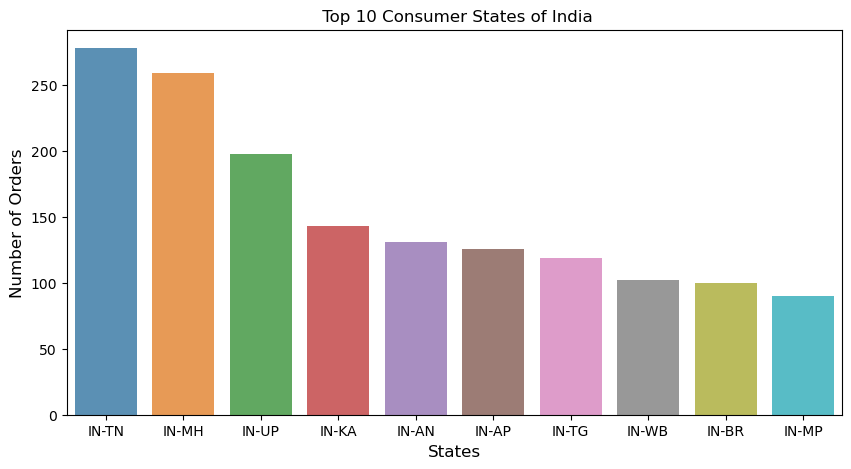

In [33]:
# To print Graph for top states

a=int(input("Enter 3 to see cx State analysis: "))
if a == 3:
    plt.figure(figsize=(10,5))
    sns.barplot(States.index, States.values, alpha=0.8)
    plt.title(' Top 10 Consumer States of India')
    plt.ylabel('Number of Orders', fontsize=12)
    plt.xlabel('States', fontsize=12)
    plt.show()
else:
    print("Enter Valid Input: ")

## Enter 4 to see the analysis of Top Consumer Cities of India

In [34]:
City_orders = data.loc[:,["Order #","Shipping Name","Shipping State","Shipping Country","Shipping City"]]
City_orders

,Order #,Shipping Name,Shipping State,Shipping Country,Shipping City
0,R929392577,Neetu Yadav,IN-HR,IND,Gurgaon
1,R653462960,Lucky Koli,IN-AN,IND,Maharashtra
2,R226302759,Raghu A,IN-KA,IND,Bangalore
3,R390235057,Hemant Vaishnav,IN-RJ,IND,Merta City nagaur
4,R813855117,Munna mumar Munna,IN-AN,IND,X
...,...,...,...,...,...
2292,R243395005,Uuu Ugagg,IN-AN,IND,Gccch
2293,R607209508,Dipam Sahu,IN-OR,IND,BERHAMPUR
2294,R140316623,lipika sahu,IN-OR,IND,berhampur
2295,R192037084,prabeen patra,IN-AN,IND,sdas


In [35]:
City_orders.dropna(inplace=True)
City_orders.isnull().sum()

Order #             0
Shipping Name       0
Shipping State      0
Shipping Country    0
Shipping City       0
dtype: int64

In [36]:
sum(City_orders.duplicated())

58

In [37]:
City_orders=City_orders.drop_duplicates()
City_orders

,Order #,Shipping Name,Shipping State,Shipping Country,Shipping City
0,R929392577,Neetu Yadav,IN-HR,IND,Gurgaon
1,R653462960,Lucky Koli,IN-AN,IND,Maharashtra
2,R226302759,Raghu A,IN-KA,IND,Bangalore
3,R390235057,Hemant Vaishnav,IN-RJ,IND,Merta City nagaur
4,R813855117,Munna mumar Munna,IN-AN,IND,X
...,...,...,...,...,...
2292,R243395005,Uuu Ugagg,IN-AN,IND,Gccch
2293,R607209508,Dipam Sahu,IN-OR,IND,BERHAMPUR
2294,R140316623,lipika sahu,IN-OR,IND,berhampur
2295,R192037084,prabeen patra,IN-AN,IND,sdas


In [38]:
Cities  = City_orders['Shipping City'].value_counts()
Cities = Cities[:10,]
Cities

Chennai      76
Bangalore    54
Hyderabad    50
Mumbai       43
Pune         29
chennai      23
Gorakhpur    22
Delhi        21
Kolkata      21
Ahmedabad    20
Name: Shipping City, dtype: int64

Enter 4 to see cx Cities analysis: 4


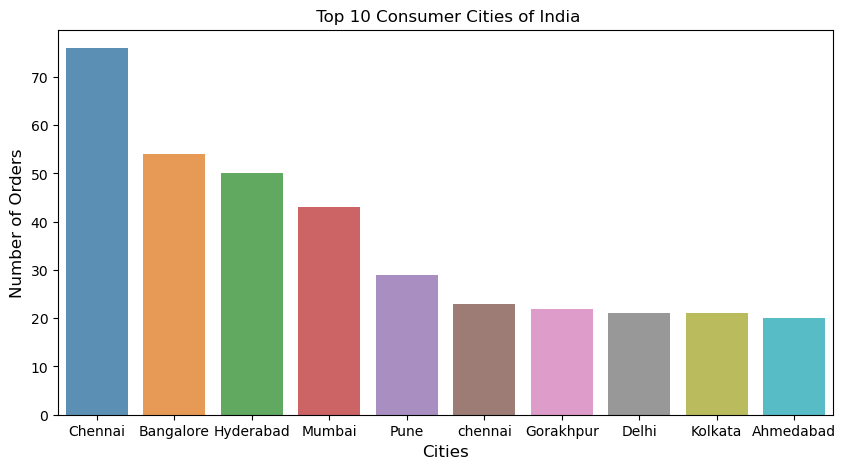

In [39]:
a=int(input("Enter 4 to see cx Cities analysis: "))
if a == 4:
    plt.figure(figsize=(10,5))
    sns.barplot(Cities.index, Cities.values, alpha=0.8)
    plt.title(' Top 10 Consumer Cities of India')
    plt.ylabel('Number of Orders', fontsize=12)
    plt.xlabel('Cities', fontsize=12)
    plt.show()
else:
    print("Enter Valid Input: ")

## Enter 5 to see the analysis of Top Selling Product Categories


In [40]:
df

,product_name,product_url,category,status,stars,ratings
0,Sony PlayStation PS2 Gaming Console 150 GB Har...,https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,5.0 star rating,5.0
1,Vmax HX 750 Quadcopter Drone (No Camera),https://yoshops.com/products/hx-750-remote-con...,Toys & Games,Reviewd,5.0 star rating,5.0
2,Yoshops VR BOX Virtual Reality Glasses Headset...,https://yoshops.com/products/yoshops-vr-box-vi...,Toys & Games,Reviewd,5.0 star rating,5.0
3,Sony PlayStation PS3 Console Slim 320 GB (Black),https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,4.9 star rating,4.9
4,Barbie Doll (pink),https://yoshops.com/products/barbie-doll,Toys & Games,Reviewd,4.9 star rating,4.9
...,...,...,...,...,...,...
1847,OLIFAIR Alkaline De-Tan Cream White - 350 gm (...,https://yoshops.com/products/olifair-alkaline-...,Mumbai,Reviewd,5.0 star rating,5.0
1848,YouTuber Akshay Bhansali YouTube Channel name ...,https://yoshops.com/products/youtuber-akshay-b...,Mumbai,Reviewd,5.0 star rating,5.0
1849,Hindi Class For STD 1 to STD 10 Free 5 Demo Class,https://yoshops.com/products/hindi-class-for-s...,Mumbai,Reviewd,5.0 star rating,5.0
1852,Hammer Smart Watch Pulse 2.0 with Blood Oxygen...,https://yoshops.com/products/hammer-smart-watc...,Mumbai,Reviewd,5.0 star rating,5.0


In [41]:
df['category'].value_counts()

Mobiles                               57
Mumbai                                40
Chennai                               40
Bengaluru                             40
Services                              40
Toys & Games                          35
Headphones                            34
Accessories                           26
Fashion                               25
Personal Care                         20
Mobiles Accessories                   20
Laptops                               20
Womens                                20
Face Makeup                           19
Gaming Accessories                    17
Computers Accessories                 16
Drones                                14
Laptop Accessories                    14
Training Internship Work From Home    11
Home & Kitchen                         6
Electronics                            6
SpareParts                             6
RC Toys                                6
Kids                                   5
Men             

In [42]:
#Erasing wrong categories

df = df.drop(df[(df.category == "Mumbai") | (df.category == "Chennai") | (df.category == "Bengaluru") | (df.category == "Services")].index)

In [43]:
Category  = df['category'].value_counts()
Category = Category[:10,]
Category

Mobiles                57
Toys & Games           35
Headphones             34
Accessories            26
Fashion                25
Personal Care          20
Laptops                20
Womens                 20
Mobiles Accessories    20
Face Makeup            19
Name: category, dtype: int64

Enter 5 to see cx Cities analysis: 5


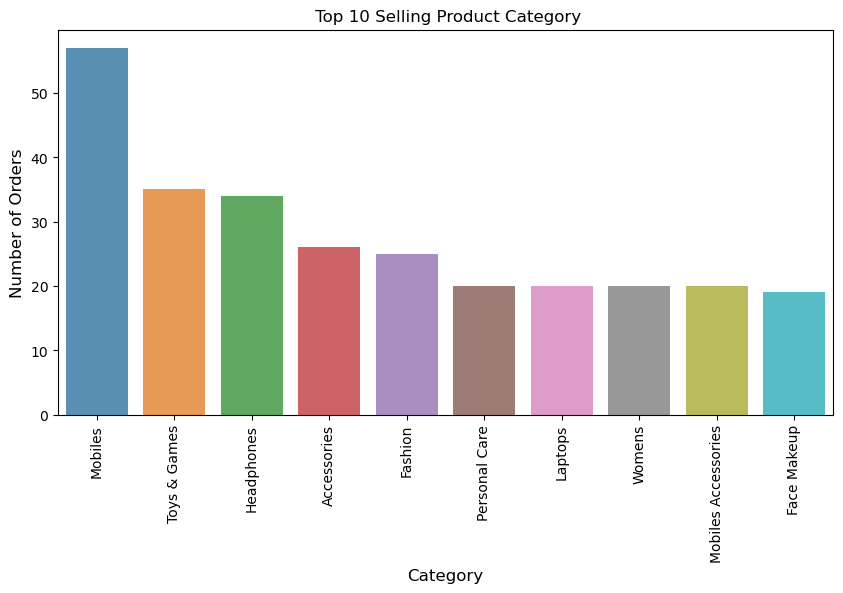

In [44]:
a=int(input("Enter 5 to see cx Cities analysis: "))
if a == 5:
    plt.figure(figsize=(10,5))
    sns.barplot(Category.index, Category.values, alpha=0.8)
    plt.title(' Top 10 Selling Product Category')
    plt.ylabel('Number of Orders', fontsize=12)
    plt.xlabel('Category', fontsize=12)
    plt.xticks(rotation=90)
    plt.show()
else:
    print("Enter Valid Input: ")

## Enter 6 to see the analysis of Reviews for All Product Categories

In [45]:
df

,product_name,product_url,category,status,stars,ratings
0,Sony PlayStation PS2 Gaming Console 150 GB Har...,https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,5.0 star rating,5.0
1,Vmax HX 750 Quadcopter Drone (No Camera),https://yoshops.com/products/hx-750-remote-con...,Toys & Games,Reviewd,5.0 star rating,5.0
2,Yoshops VR BOX Virtual Reality Glasses Headset...,https://yoshops.com/products/yoshops-vr-box-vi...,Toys & Games,Reviewd,5.0 star rating,5.0
3,Sony PlayStation PS3 Console Slim 320 GB (Black),https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,4.9 star rating,4.9
4,Barbie Doll (pink),https://yoshops.com/products/barbie-doll,Toys & Games,Reviewd,4.9 star rating,4.9
...,...,...,...,...,...,...
1533,Upstox Free Demat & Trading Account Get Free G...,https://yoshops.com/products/upstox-free-demat...,Blog Sponsorship,Reviewd,5.0 star rating,5.0
1537,YouTuber Akshay Bhansali YouTube Channel name ...,https://yoshops.com/products/youtuber-akshay-b...,Blog Sponsorship,Reviewd,5.0 star rating,5.0
1539,Upstox Free Demat & Trading Account Get Free G...,https://yoshops.com/products/upstox-free-demat...,Instagram Sponsorship,Reviewd,5.0 star rating,5.0
1543,YouTuber Akshay Bhansali YouTube Channel name ...,https://yoshops.com/products/youtuber-akshay-b...,Instagram Sponsorship,Reviewd,5.0 star rating,5.0


In [46]:
category_review = df.loc[:,["category","ratings"]]
category_review

,category,ratings
0,Toys & Games,5.0
1,Toys & Games,5.0
2,Toys & Games,5.0
3,Toys & Games,4.9
4,Toys & Games,4.9
...,...,...
1533,Blog Sponsorship,5.0
1537,Blog Sponsorship,5.0
1539,Instagram Sponsorship,5.0
1543,Instagram Sponsorship,5.0


In [47]:
category_review.groupby(['category', 'ratings']).size()
category_review

,category,ratings
0,Toys & Games,5.0
1,Toys & Games,5.0
2,Toys & Games,5.0
3,Toys & Games,4.9
4,Toys & Games,4.9
...,...,...
1533,Blog Sponsorship,5.0
1537,Blog Sponsorship,5.0
1539,Instagram Sponsorship,5.0
1543,Instagram Sponsorship,5.0


Enter 6 to see cx Cities analysis: 6


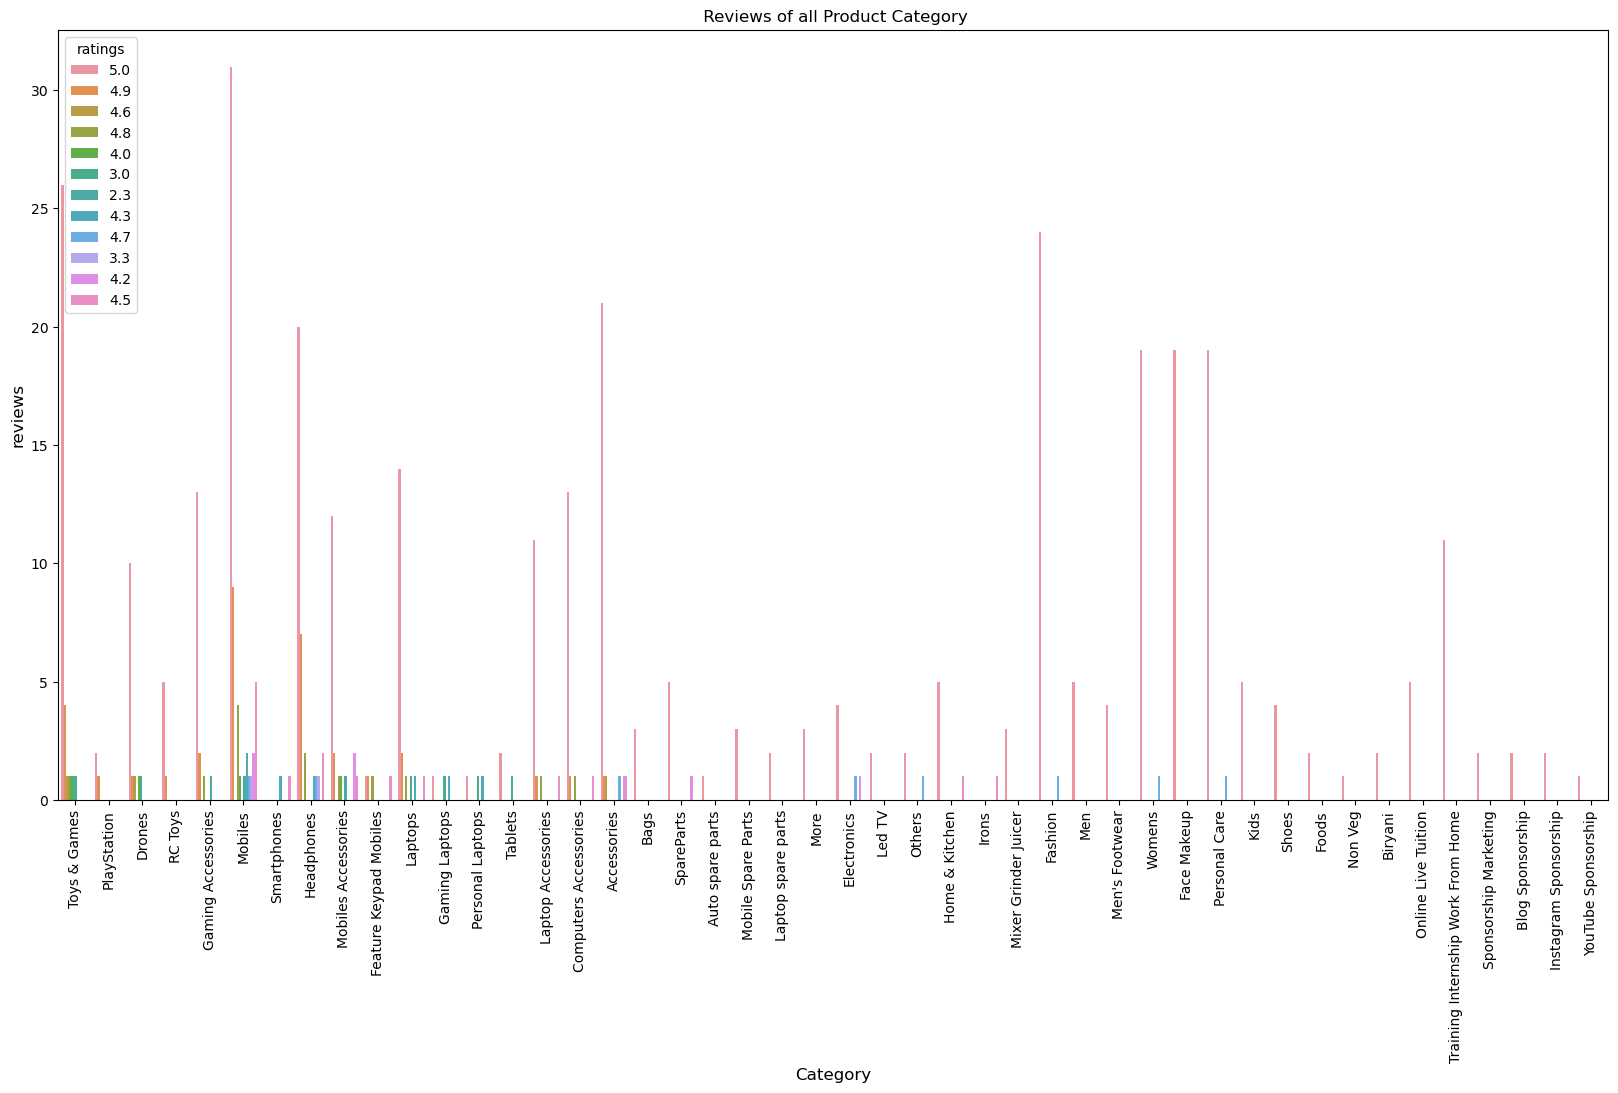

In [49]:
a=int(input("Enter 6 to see cx Cities analysis: "))
if a == 6:
    plt.figure(figsize=(20,10))
    #sns.barplot(category_review['category'].index, category_review['ratings'].values, alpha=0.8)
    sns.countplot(data=category_review, x='category',hue='ratings')
    plt.title(' Reviews of all Product Category')
    plt.ylabel('reviews', fontsize=12)
    plt.xlabel('Category', fontsize=12)
    plt.xticks(rotation=90)
    plt.show()
else:
    print("Enter Valid Input: ")

## Enter 7 to see the analysis of Number of Orders Per Month Per Year

In [50]:
data.head()

,Order #,Order Date and Time Stamp,Fulfillment Status,Payment Status,Payment Date and Time Stamp,Fulfillment Date and Time Stamp,Currency,Subtotal,Shipping Method,Shipping Cost,...,Payment Method,Tracking #,Special Instructions,LineItem Name,LineItem SKU,LineItem Options,LineItem Add-ons,LineItem Qty,LineItem Sale Price,LineItem Type
0,R929392577,09-11-2020 20:36:26 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Boat Rockerz 530 Bluetooth Headphone with Mic ...,NaN,NaN,NaN,1,₹ 799.00,physical
1,R653462960,09-11-2020 20:18:26 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Samsung U Flex Wireless Bluetooth Flexible Hea...,PL000032123,NaN,NaN,1,₹ 699.00,physical
2,R226302759,09-11-2020 19:56:21 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Boat Rockerz 530 Bluetooth Headphone with Mic ...,NaN,NaN,NaN,1,₹ 799.00,physical
3,R390235057,09-11-2020 19:37:40 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 599.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,JBL Tempo On-Ear Headphone,PL000157,NaN,NaN,1,₹ 599.00,physical
4,R813855117,09-11-2020 18:35:47 +0530,Cancelled,Paid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Mi Neckband Bluetooth Headset with Mic (Black),PL000041332,NaN,NaN,1,₹ 699.00,physical


In [51]:
data.isnull().sum()

Order #                               0
Order Date and Time Stamp             0
Fulfillment Status                    0
Payment Status                        0
Payment Date and Time Stamp        2057
Fulfillment Date and Time Stamp    2068
Currency                              0
Subtotal                              0
Shipping Method                       0
Shipping Cost                         0
Tax Method                         2296
Taxes                                 0
Total                                 0
Coupon Code                        2140
Coupon Code Name                   2140
Discount                              0
Billing Name                       1967
Billing Country                    1967
Billing Street Address             1967
Billing Street Address 2           2100
Billing City                       1967
Billing State                      1975
Billing Zip                        1967
Shipping Name                         0
Shipping Country                      0


In [52]:
sum(data.duplicated())

0

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Order #                          2297 non-null   object 
 1   Order Date and Time Stamp        2297 non-null   object 
 2   Fulfillment Status               2297 non-null   object 
 3   Payment Status                   2297 non-null   object 
 4   Payment Date and Time Stamp      240 non-null    object 
 5   Fulfillment Date and Time Stamp  229 non-null    object 
 6   Currency                         2297 non-null   object 
 7   Subtotal                         2297 non-null   object 
 8   Shipping Method                  2297 non-null   object 
 9   Shipping Cost                    2297 non-null   object 
 10  Tax Method                       1 non-null      object 
 11  Taxes                            2297 non-null   object 
 12  Total               

In [54]:
data.describe()

,Gift Cards,Special Instructions,LineItem Qty
count,0.0,0.0,2297.000000
mean,NaN,NaN,3.740531
std,NaN,NaN,46.748117
min,NaN,NaN,1.000000
25%,NaN,NaN,1.000000
50%,NaN,NaN,1.000000
75%,NaN,NaN,1.000000
max,NaN,NaN,999.000000


In [55]:
time_date=data[['Order #','Order Date and Time Stamp']]
time_date.head()

,Order #,Order Date and Time Stamp
0,R929392577,09-11-2020 20:36:26 +0530
1,R653462960,09-11-2020 20:18:26 +0530
2,R226302759,09-11-2020 19:56:21 +0530
3,R390235057,09-11-2020 19:37:40 +0530
4,R813855117,09-11-2020 18:35:47 +0530


In [56]:

time_date['Order Date and Time Stamp']=pd.to_datetime(time_date['Order Date and Time Stamp'])

In [57]:
time_date['Order Date and Time Stamp'].dtype

datetime64[ns, pytz.FixedOffset(330)]

In [58]:
time_date['year']=pd.to_datetime(time_date['Order Date and Time Stamp']).dt.year
time_date['month']=pd.to_datetime(time_date['Order Date and Time Stamp']).dt.month
time_date['month_name']=pd.to_datetime(time_date['Order Date and Time Stamp']).dt.month_name()
time_date['day']=pd.to_datetime(time_date['Order Date and Time Stamp']).dt.day
time_date['day_name']=pd.to_datetime(time_date['Order Date and Time Stamp']).dt.day_name()
time_date['hours']=pd.to_datetime(time_date['Order Date and Time Stamp']).dt.hour

In [59]:
time_date.head()

,Order #,Order Date and Time Stamp,year,month,month_name,day,day_name,hours
0,R929392577,2020-09-11 20:36:26+05:30,2020,9,September,11,Friday,20
1,R653462960,2020-09-11 20:18:26+05:30,2020,9,September,11,Friday,20
2,R226302759,2020-09-11 19:56:21+05:30,2020,9,September,11,Friday,19
3,R390235057,2020-09-11 19:37:40+05:30,2020,9,September,11,Friday,19
4,R813855117,2020-09-11 18:35:47+05:30,2020,9,September,11,Friday,18


In [60]:
year_count=time_date.groupby('year').count().sort_values('Order #', ascending=False).reset_index()
YEAR=year_count[['year','Order #']]
YEAR

,year,Order #
0,2020,1655
1,2018,251
2,2019,210
3,2017,118
4,2016,63


In [61]:
YEAR['Pct_chage']=YEAR['Order #'].pct_change()
YEAR

,year,Order #,Pct_chage
0,2020,1655,NaN
1,2018,251,-0.848338
2,2019,210,-0.163347
3,2017,118,-0.438095
4,2016,63,-0.466102


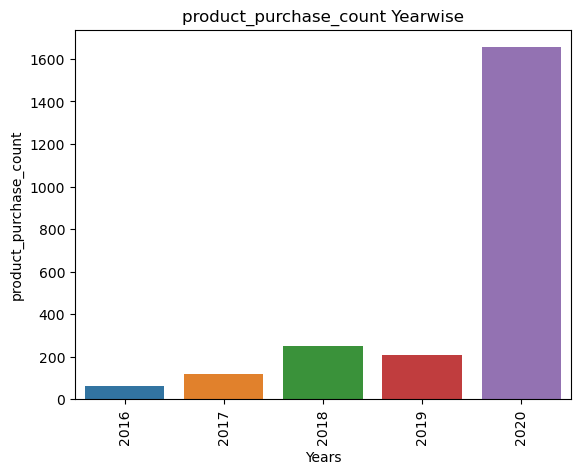

In [62]:
    plt.gcf()
    sns.barplot(data=year_count , x='year' ,y='Order #')
    plt.xlabel('Years')
    plt.ylabel('product_purchase_count')
    plt.title('product_purchase_count Yearwise')
    plt.xticks(rotation=90)
    plt.savefig('year_wise_count.pdf')

In [63]:
month_count=time_date.groupby('month_name').count().sort_values('Order #', ascending=False).reset_index()
MONTH=month_count[['month_name','Order #']]
MONTH

,month_name,Order #
0,October,503
1,September,270
2,July,239
3,August,223
4,June,200
5,March,164
6,May,163
7,April,146
8,January,116
9,February,92


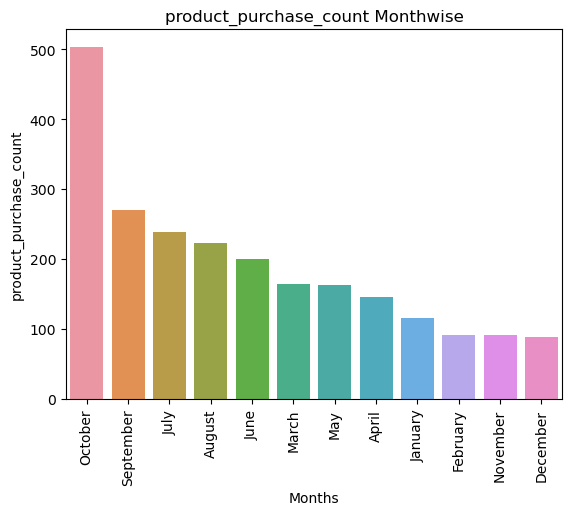

In [64]:
plt.gcf()
sns.barplot(data=month_count.sort_values('Order #',ascending=False) , x='month_name' ,y='Order #')
plt.xlabel('Months')
plt.ylabel('product_purchase_count')
plt.title('product_purchase_count Monthwise')
plt.xticks(rotation=90)
plt.savefig('month_wise_count.pdf')

In [65]:
time_date.head()

,Order #,Order Date and Time Stamp,year,month,month_name,day,day_name,hours
0,R929392577,2020-09-11 20:36:26+05:30,2020,9,September,11,Friday,20
1,R653462960,2020-09-11 20:18:26+05:30,2020,9,September,11,Friday,20
2,R226302759,2020-09-11 19:56:21+05:30,2020,9,September,11,Friday,19
3,R390235057,2020-09-11 19:37:40+05:30,2020,9,September,11,Friday,19
4,R813855117,2020-09-11 18:35:47+05:30,2020,9,September,11,Friday,18


In [66]:
per_year_per_month=time_date.groupby(['year', 'month_name']).count().sort_values('year').reset_index()

In [67]:
PER_YEAR_MONTH=per_year_per_month[['year','month_name','Order #']]
PER_YEAR_MONTH.sample(5)

,year,month_name,Order #
30,2018,December,12
16,2017,February,10
20,2017,April,3
21,2017,July,22
29,2018,February,14


Enter 7 to see cx Cities analysis: 7


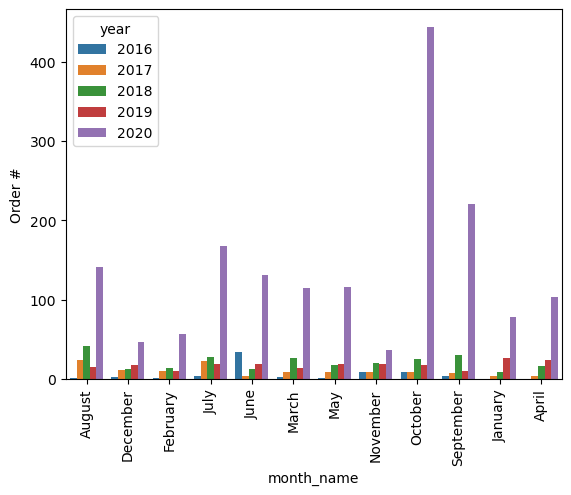

In [70]:
a=int(input("Enter 7 to see cx Cities analysis: "))
if a == 7:
    plt.gcf()
    sns.barplot(data=PER_YEAR_MONTH, x='month_name', y='Order #',hue='year')
    plt.xticks(rotation=90)
    plt.savefig('per_year_per_month.pdf')
else:
    print("Enter Valid Input: ")

In [71]:
x=per_year_per_month[['year','month_name','Order #']].sort_values('Order #', ascending=False).reset_index()

In [72]:
x.head()

,index,year,month_name,Order #
0,51,2020,October,444
1,57,2020,September,220
2,50,2020,July,168
3,54,2020,August,141
4,49,2020,June,131


<Figure size 640x480 with 0 Axes>

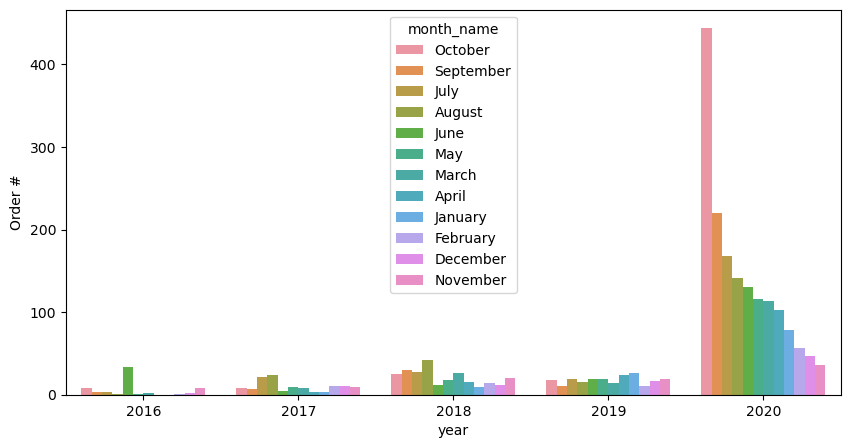

In [73]:
# just change in visulaziationn part as per month wise
plt.gcf()
plt.figure(figsize=(10,5))
sns.barplot(data=x, x='year', y='Order #', hue='month_name')
plt.savefig('per_month_per_year_2.pdf')

## 8. analysis of Reviews for Number of Orders Per Month Per Year

In [74]:
time_date

,Order #,Order Date and Time Stamp,year,month,month_name,day,day_name,hours
0,R929392577,2020-09-11 20:36:26+05:30,2020,9,September,11,Friday,20
1,R653462960,2020-09-11 20:18:26+05:30,2020,9,September,11,Friday,20
2,R226302759,2020-09-11 19:56:21+05:30,2020,9,September,11,Friday,19
3,R390235057,2020-09-11 19:37:40+05:30,2020,9,September,11,Friday,19
4,R813855117,2020-09-11 18:35:47+05:30,2020,9,September,11,Friday,18
...,...,...,...,...,...,...,...,...
2292,R243395005,2016-05-10 04:17:45+05:30,2016,5,May,10,Tuesday,4
2293,R607209508,2016-03-10 15:10:47+05:30,2016,3,March,10,Thursday,15
2294,R140316623,2016-09-29 18:33:27+05:30,2016,9,September,29,Thursday,18
2295,R192037084,2016-09-28 18:59:22+05:30,2016,9,September,28,Wednesday,18


In [75]:
Reviews_order_month_year = time_date[['Order #','year','month_name']]
Reviews_order_month_year.head(10)

,Order #,year,month_name
0,R929392577,2020,September
1,R653462960,2020,September
2,R226302759,2020,September
3,R390235057,2020,September
4,R813855117,2020,September
5,R754638660,2020,September
6,R513882916,2020,September
7,R224377947,2020,September
8,R159044399,2020,September
9,R582285083,2020,September


In [ ]:
a=int(input("Enter 8 to see analysis of Reviews for Number of Orders Per Month Per Year "))
if a == 8:
    plt.gcf()
    sns.countplot(data=Reviews_order_month_year, x='month_name' ,hue='year')
    plt.xticks(rotation=90)
    plt.savefig('Reviews_order_month_year.pdf')
    plt.show()
else:
    print("Enter Valid Input: ")

## 9.to see the analysis of Number of Orders Across Parts of a Day

In [ ]:
time_date.head()

In [ ]:
#plt.gcf()
#sns.countplot(time_date['day_name'])
#plt.savefig('day_wise_count.pdf')

In [ ]:
a=int(input("Enter 9 to see cx Cities analysis: "))
if a == 9:
    plt.gcf()
    sns.countplot(time_date['hours'])
    plt.savefig('hours_wise.pdf')
    plt.show()
else:
    print("Enter Valid Input: ")

## Enter 10 to see the Full Report

In [ ]:
a=int(input("Enter 10 to see FUll REPORT: "))
if a == 10:
    sns.countplot(x = 'stars', palette='viridis', data=df )
    plt.title('Rating Distribution', size=15)
    plt.xlabel('Ratings')
    plt.xticks(rotation=90)
    plt.show()
    
    sns.countplot(x = 'Method', palette='viridis', data=payment_method)
    plt.title('Payment_Method Analysis', size=12)
    plt.xlabel('Payment_Method')
    plt.show()
    
    plt.figure(figsize=(10,5))
    sns.barplot(States.index, States.values, alpha=0.8)
    plt.title(' Top 10 Consumer States of India')
    plt.ylabel('Number of Orders', fontsize=12)
    plt.xlabel('States', fontsize=12)
    plt.show()
    
    plt.figure(figsize=(10,5))
    sns.barplot(Cities.index, Cities.values, alpha=0.8)
    plt.title(' Top 10 Consumer Cities of India')
    plt.ylabel('Number of Orders', fontsize=12)
    plt.xlabel('Cities', fontsize=12)
    plt.show()
    
    plt.figure(figsize=(10,5))
    sns.barplot(Category.index, Category.values, alpha=0.8)
    plt.title(' Top 10 Selling Product Category')
    plt.ylabel('Number of Orders', fontsize=12)
    plt.xlabel('Category', fontsize=12)
    plt.xticks(rotation=90)
    plt.show()
    
    plt.figure(figsize=(20,10))
    #sns.barplot(category_review['category'].index, category_review['ratings'].values, alpha=0.8)
    sns.countplot(data=category_review, x='category',hue='ratings')
    plt.title(' Reviews of all Product Category')
    plt.ylabel('reviews', fontsize=12)
    plt.xlabel('Category', fontsize=12)
    plt.xticks(rotation=90)
    plt.show()
    
    plt.gcf()
    sns.barplot(data=PER_YEAR_MONTH, x='month_name', y='Order #',hue='year')
    plt.xticks(rotation=90)
    plt.savefig('per_year_per_month.pdf')
    
    plt.gcf()
    sns.countplot(data=Reviews_order_month_year, x='month_name' ,hue='year')
    plt.xticks(rotation=90)
    plt.savefig('Reviews_order_month_year.pdf')
    plt.show()
    
    plt.gcf()
    sns.countplot(time_date['hours'])
    plt.savefig('hours_wise.pdf')
    plt.show()
    
else:
    print("Enter Valid Input: ")

In [ ]:
# Excell Report

with pd.ExcelWriter("Report.xlsx") as writer:
    df.to_excel(writer, sheet_name="Rating Analysis")
    payment_method.to_excel(writer, sheet_name="payment_method")
    States.to_excel(writer, sheet_name="States")
    Cities.to_excel(writer, sheet_name="Cities")
    Category.to_excel(writer, sheet_name="Category")
    PER_YEAR_MONTH.to_excel(writer, sheet_name="PER_YEAR_MONTH")
    x.to_excel(writer, sheet_name="per_Year_per_month")